# Libraries

In [1]:
import pandas as pd
import numpy as np

# Constants

In [2]:
SEED = 42

# Load the data

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Analysis

In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (4209, 378)
Test shape: (4209, 377)


# Feature encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for column_name in train.columns[2:]:
    label_encoder = LabelEncoder() 
    
    train_column_values = list(train[column_name].values)
    test_column_values = list(test[column_name].values)
    
    label_encoder.fit(train_column_values + test_column_values)
    
    train[column_name] = label_encoder.transform(train_column_values)
    test[column_name] = label_encoder.transform(test_column_values)

In [48]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


# Feature engineering

In [11]:
from sklearn.decomposition import PCA



In [49]:
COMPONENT_NUM = 90

decompositions = [PCA(n_components=COMPONENT_NUM, random_state=SEED)]

decomp_names = [ 'PCA']

train_decomp_features = [decompositor.fit_transform(train.drop(["y"], axis=1)) for decompositor in decompositions]
test_decomp_features = [decompositor.transform(test) for decompositor in decompositions]

In [50]:
decomposition_features = []

for i in range(1, COMPONENT_NUM + 1):
    
    for feature_name, train_decomp_feature, test_decomp_feature in zip(
        decomp_names,
        train_decomp_features,
        test_decomp_features
    ):
    
        enumerated_feature_name = feature_name + '_' + str(i)
        train[enumerated_feature_name] = train_decomp_feature[:,i-1]
        test[enumerated_feature_name] = test_decomp_feature[:,i-1]
        
        decomposition_features.append(enumerated_feature_name)

In [51]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,PCA_81,PCA_82,PCA_83,PCA_84,PCA_85,PCA_86,PCA_87,PCA_88,PCA_89,PCA_90
0,0,130.81,37,23,20,0,3,27,9,14,...,-0.733996,-0.397716,-0.959606,-0.251004,-0.136872,-0.391049,-0.090767,-0.204807,0.154351,0.277541
1,6,88.53,37,21,22,4,3,31,11,14,...,0.031774,-0.041736,-0.132526,0.392089,-0.353464,-0.030103,0.188480,-0.072705,-0.277157,-0.154363
2,7,76.26,24,24,38,2,3,30,9,23,...,-0.063607,0.357003,0.201505,-0.204093,0.370105,-0.197373,0.197227,0.671006,-0.200105,0.147111
3,9,80.62,24,21,38,5,3,30,11,4,...,-0.598405,0.060842,0.018898,-0.103051,0.078673,0.010289,-0.218376,-0.187154,0.082402,0.142695
4,13,78.02,24,23,38,5,3,14,3,13,...,-0.299010,-0.019029,0.142497,-0.188858,0.089257,-0.130202,-0.212819,-0.019594,0.023452,0.290443


In [52]:
# #These features overfit (meh)

 categorical_features_num = 9
 for i in range(categorical_features_num):
     if i == 7:         
            continue
    
             new_feature_name = 'mean_x' + str(i)
             select_feature_name = 'X' + str(i)
    
             mean_feature = train[[select_feature_name, 'y']].groupby([select_feature_name], as_index=False).median()
             mean_feature.columns = [select_feature_name, new_feature_name]
    
             train = pd.merge(train, mean_feature, on=select_feature_name, how='outer')
    
             test = pd.merge(test, mean_feature, on=select_feature_name, how='left')
             test[new_feature_name].fillna(test[new_feature_name].dropna().median(), inplace=True)

IndentationError: unexpected indent (<ipython-input-52-41a1b1a2ec48>, line 3)

In [53]:
important_features = ['X0','X5', 'X6', 'X8', 'X29', 'X47', 'X115', 'X118', 'X127', 'X314', 'X315']

transformations = {
    'abs': lambda x: abs(x),
    'squared': lambda x: x**2,
    'log': lambda x: np.log(x) if x > 1 else 0,
    'sqrt': lambda x: np.sqrt(x) if x > 0 else 0,
    'not_0': lambda x: 1 if x != 0 else 0,
    'bool_1': lambda x: 1 if x > 8 else 0,
    'bool_2': lambda x: 1 if x > 16 else 0,
    'bool_3': lambda x: 1 if x > 27 else 0,
}

added_features = []

for important_feature in important_features:
    for name, func in transformations.items():
        
        feature_name = important_feature + '_' + name
        train[feature_name] = train[important_feature].apply(func)
        test[feature_name] = train[important_feature].apply(func)
        
        added_features.append(feature_name)
        
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X314_bool_2,X314_bool_3,X315_abs,X315_squared,X315_log,X315_sqrt,X315_not_0,X315_bool_1,X315_bool_2,X315_bool_3
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,0,0,0,0.0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,0,0,0,0,0,0.0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0.0,0,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0.0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0.0,0,0,0,0


In [54]:
import itertools

important_features = ['X0','X5', 'X6', 'X8', 'X29', 'X47', 'X115', 'X118', 'X127', 'X314', 'X315']

transformations = {
    '_mul_': lambda x,y: x * y,
    '_div_': lambda x,y: x / (y + 3.123e-3),
    '_abs_': lambda x,y: abs(x - y),
}

for feature_combination in itertools.combinations(important_features, 2):
    for operation_name, operation_func in transformations.items():
        feature_name = operation_name.join(feature_combination)
    
        train[feature_name] = operation_func(train[feature_combination[0]], train[feature_combination[1]])
        test[feature_name] = operation_func(test[feature_combination[0]], test[feature_combination[1]])
        
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X118_abs_X315,X127_mul_X314,X127_div_X314,X127_abs_X314,X127_mul_X315,X127_div_X315,X127_abs_X315,X314_mul_X315,X314_div_X315,X314_abs_X315
0,0,130.81,37,23,20,0,3,27,9,14,...,1,0,0.000000,0,0,0.000000,0,0,0.0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,320.204931,1,0,320.204931,1,0,0.0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0.000000,0,0,0.000000,0,0,0.0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0.000000,0,0,0.000000,0,0,0.0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0.000000,0,0,0.000000,0,0,0.0,0


# Target and features

In [55]:
target = 'y'

try:
    features = list(train.columns[2:]) + decomposition_features + [train.columns[0]]
except:
    features = list(train.columns[2:]) + [train.columns[0]]

# Deduplicate features
features = list(set(features))

In [56]:
print(features)

['X6_abs_X8', 'PCA_41', 'X20', 'X115_squared', 'X73', 'X137', 'X258', 'X0_squared', 'X222', 'X29_div_X118', 'X0_mul_X314', 'X161', 'X29_div_X314', 'X74', 'PCA_28', 'X0_div_X5', 'X354', 'X373', 'X5_div_X127', 'X6_mul_X29', 'X276', 'PCA_86', 'X335', 'X5_abs_X315', 'X147', 'X47', 'X29_abs_X118', 'PCA_44', 'X200', 'X237', 'X170', 'X8_div_X315', 'X176', 'X185', 'X317', 'X5_bool_1', 'X47_div_X315', 'X252', 'X248', 'X34', 'X92', 'X21', 'X370', 'X82', 'X153', 'X29_mul_X315', 'X152', 'PCA_11', 'X113', 'X118_mul_X315', 'X349', 'X168', 'X243', 'X271', 'X6_sqrt', 'X46', 'X186', 'X127_bool_2', 'X0_mul_X118', 'X80', 'PCA_53', 'X115_abs_X314', 'X104', 'X8_mul_X115', 'X127_mul_X315', 'X323', 'X197', 'X47_div_X115', 'X115_abs_X118', 'X364', 'X100', 'X6_mul_X8', 'X282', 'X6_abs_X29', 'X372', 'PCA_15', 'X220', 'X287', 'X305', 'X44', 'X8_abs_X315', 'X115_abs', 'X99', 'X284', 'X8_sqrt', 'X29_bool_1', 'X339', 'X6', 'X363', 'PCA_26', 'X314_squared', 'X181', 'X338', 'X0_abs_X315', 'PCA_42', 'X0_abs_X118', 'X5

# Outlier detection and removal

In [20]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

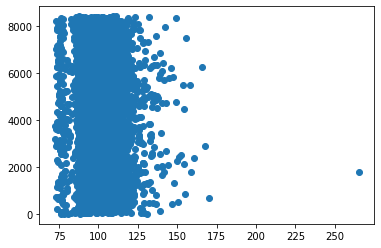

In [21]:
plt.scatter(train[target], train['ID'])
plt.show()

In [40]:
train = train[train.y < 250]

# Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from multiprocessing import Pool



In [57]:
X_train = train[features]
X_test = test[features]

y_train = train[target]

print(X_train.shape, X_test.shape)

(4209, 720) (4209, 720)


In [58]:
X_train.head()

,X6_abs_X8,PCA_41,X20,X115_squared,X73,X137,X258,X0_squared,X222,X29_div_X118,...,PCA_67,X191,X336,PCA_21,X18,X132,X202,X6_div_X118,X297,X315_sqrt
0,5,-0.240821,0,0,0,1,0,1369,0,0.000000,...,-0.059843,0,0,0.018655,1,0,0,8.971981,0,0.0
1,3,-0.235718,0,0,0,0,0,1369,0,0.000000,...,0.189359,0,1,-0.181926,1,1,0,10.965754,0,0.0
2,14,0.458048,0,0,0,1,0,576,0,320.204931,...,-0.396817,0,0,0.616615,0,1,0,2881.844380,0,0.0
3,7,-0.310746,0,0,0,0,0,576,0,320.204931,...,0.069010,0,0,0.434820,0,1,0,3522.254243,0,0.0
4,10,-0.260103,0,0,0,0,0,576,0,320.204931,...,-0.000701,0,0,-0.221654,0,1,0,960.614793,0,0.0


In [44]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train.as_matrix(), y_train.as_matrix(), test_size=0.1, random_state=SEED
# )

In [59]:
scaler = StandardScaler()

# # train_X = np.nan_to_num(train_X)
# # val_X = np.nan_to_num(val_X)
# # test_X = np.nan_to_num(test_X)

X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model

In [60]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [61]:
from sklearn.utils import shuffle

class PseudoLabeler(object):
    
    def __init__(self, model, train, test, features, target, seed=42):
        '''
        Wrapper for sklearn models for pseudo labeling.
        '''
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.train = train
        self. test = test
        
        self.features = features
        self.target = target
        
    def fit(self, sample_rate=0.2, validation_split=0.1, verbose=0):
        '''
        Fit the data using pseudo labeling.
        
        @sample_rate - percent of samples from test set
        @validation_split - validation used to compare results
        
        Returns both R2 scores
        '''
        num_to_sample = int(len(X_train) * 0.2)
        
        if verbose == 1:
            print('train size: {}, test size: {}, sample size: {} '.format(
                len(self.train), len(self.test), num_to_sample)
            ) 
        
        train, validation = train_test_split(self.train, test_size=validation_split, random_state=self.seed)
        
        self.model.fit(train[self.features], train[self.target])
        y_pred = self.model.predict(validation[features])
        R2_raw_train = r2_score(validation[target], y_pred)
        
        augemented_train = self.__create_augmented_test(train, num_to_sample)
        self.model.fit(augemented_train[features], augemented_train[target])
        
        y_pred = self.model.predict(validation[features])
        R2_pseudo_train = r2_score(validation[target], y_pred)
        
        if verbose == 1:
            print('R2(with raw train set): %f' % R2_raw_train)
            print('R2(with pseudo train): %f' % R2_pseudo_train)
            
        return R2_raw_train, R2_pseudo_train
        

    def __create_augmented_test(self, train, num_of_samples):
        self.model.fit(
            train[self.features],
            train[self.target]
        )
        y_test = model.predict(self.test[self.features])
        
        augmented_test = test.copy(deep=True)
        augmented_test['y'] = y_test
        
        sampled_test = augmented_test.sample(n=num_of_samples)
        augemented_train = pd.concat([sampled_test, train])
        augmented_train = shuffle(augemented_train)
        return augmented_train
        
    def predict(self, x):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(x)
    
    def get_model_name(self):
        return self.model.__class__.__name__

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print('R2:', r2_score(y_val, y_pred))
print('MSE:', mean_squared_error(y_val, y_pred))

NameError: name 'X_val' is not defined

In [67]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.model_selection import cross_val_score
models = [
     XGBRegressor(
         n_estimators=1500,
         learning_rate=0.1,
         min_child_weight=1.5,
         max_depth=1,
         gamma=0.0,
         colsample_bytree=0.85,
         subsample=1.0,
         reg_alpha=96,
         reg_lambda=5e-06,
         seed=SEED,
         nthread=1
     ),
    BayesianRidge(
        compute_score=True,
        fit_intercept=True,
        normalize=False,
        alpha_1=0,
        alpha_2=0.01,
        lambda_1=15,
        lambda_2=0,
        tol=1e-06,
    ),
#     SVR(
#         kernel='rbf',
#         C=123,
#         gamma=3.0517578125e-05,
#         epsilon=0.072
#     )
]
    
for model in models:
    print(model.__class__.__name__)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=8, n_jobs=8)
    print("R2: %0.5f (+/- %0.3f)\n" % (scores.mean(), scores.std() * 2))
 

# 90 componenets, scaled, without outlier, jittered 
# XGBRegressor
# R2: 0.38387 (+/- 0.655)

# BayesianRidge
# R2: 0.56411 (+/- 0.140)

# SVR
# R2: 0.54078 (+/- 0.187)

# NuSVR
# R2: 0.56475 (+/- 0.164)

XGBRegressor
R2: 0.56371 (+/- 0.162)

BayesianRidge
R2: 0.56502 (+/- 0.159)



In [65]:
from sklearn.svm import SVR, NuSVR, LinearSVR
params = {
    'nu':[0.3, 0.33, 0.37, 0.41, 0.42, 0.45, 0.48]
}

model = GridSearchCV(
        NuSVR(
            nu=0.42,
            kernel='rbf',
            C=123,
            gamma=3.0517578125e-05,
        ),
        params,
        cv=3,
        n_jobs=8,
        verbose=3,
        scoring='r2'
)

model.fit(X_train, y_train)
print(model.best_params_, model.best_score_)

y_pred = model.predict(X_train)
print('R2 train:', r2_score(y_train, y_pred))
print('MSE train:', mean_squared_error(y_train, y_pred))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  14 out of  21 | elapsed:   40.9s remaining:   20.4s
[Parallel(n_jobs=8)]: Done  21 out of  21 | elapsed:   53.6s finished


{'nu': 0.37} 0.561192300497145


NameError: name 'r2_score' is not defined

In [ ]:
# model.add(Dense(16, kernel_initializer=lecun_uniform()))
# model.add(Activation(selu))
# model.add(BatchNormalization())
# model.add(AlphaDropout(0.14))

model = Sequential()

model.add(Dense(500, input_dim=X_train.shape[1], kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(500, kernel_initializer=lecun_uniform()))
model.add(Activation(selu))
model.add(BatchNormalization())
model.add(Dropout(0.31))


model.add(Dense(1, activation='linear'))   

In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=Nadam(0.0001, clipnorm=1.0),
    metrics=[R2]
)

model.fit(
    X_train, y_train,
    batch_size=512,
    epochs=222,
    validation_data = (X_val, y_val),
    verbose=0,
    callbacks=[TQDMNotebookCallback()] 
)

## Submission

In [52]:
# BayesianRidge(
#     compute_score=True,
#     fit_intercept=True,
#     normalize=False,
#     alpha_1=0,
#     alpha_2=0.01,
#     lambda_1=15,
#     lambda_2=0,
#     tol=1e-06,
# )

# NuSVR(
#     nu=0.42,
#     kernel='rbf',
#     C=123,
#     gamma=3.0517578125e-05,
# ) 

# SVR(
#     kernel='rbf',
#     C=123,
#     gamma=3.0517578125e-05,
#     epsilon=0.072
# )


model = BayesianRidge(
    compute_score=True,
    fit_intercept=True,
    normalize=False,
    alpha_1=0,
    alpha_2=0.01,
    lambda_1=15,
    lambda_2=0,
    tol=1e-06,
)
model.fit(X_train, y_train)

BayesianRidge(alpha_1=0, alpha_2=0.01, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=15, lambda_2=0, n_iter=300,
       normalize=False, tol=1e-06, verbose=False)

In [ ]:
try:
    X_test = X_test.as_matrix()
except Exception:
    pass

In [53]:
try:
    predictions = model.predict(X_test).ravel()
except:
    predictions = model.predict(dtest)

In [54]:
predictions

array([ 107.84015281,  117.33097904,  -33.6865338 , ...,   96.36667813,
        105.97474521,   91.85332402])

In [55]:
model_name = 'BR_CV5_R2_58523_no_outlier'
#model.save('../models/' + model_name + '.h5')

output = pd.DataFrame({'id': test['ID'].copy().values, 'y': predictions})
output.to_csv('../submissions/submission_' + model_name + '.csv', index=False)